In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('rating.csv')

In [4]:
df

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your labeled news data into a DataFrame
# Assuming you have a DataFrame named df with columns 'text' and 'sentiment'
# 'text' column contains the news articles and 'sentiment' column contains the labels
# Example:
# df = pd.read_csv('labeled_news_data.csv')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['title'], df['title_sentiment'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=10000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Initialize a Support Vector Machine (SVM) classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier on the training data
svm_classifier.fit(X_train_vectorized, y_train)

# Predict sentiment on the test data
predictions = svm_classifier.predict(X_test_vectorized)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.8450993831391364


In [6]:
value_counts = df['source_name'].value_counts()

print(value_counts)

source_name
ETF Daily News                  16746
The Times of India               7504
GlobeNewswire                    5423
Globalsecurity.org               3119
Forbes                           2784
BBC News                         2113
ABC News                         2058
Business Insider                 2034
The Punch                        1800
Al Jazeera English               1664
Marketscreener.com               1362
Phys.Org                         1263
International Business Times     1207
The Indian Express               1176
RT                               1128
NPR                               981
Deadline                          932
Digital Trends                    784
Boing Boing                       713
CNA                               674
Time                              600
Android Central                   522
Gizmodo.com                       388
ReadWrite                         324
Euronews                          286
Wired                             270


Right-leaning:

ETF Daily News: As a financial news website, it may not have a clear political leaning.
Forbes: Forbes tends to have a pro-business and capitalist perspective, but it also publishes a diverse range of opinions.
Business Insider: While it covers a broad range of topics, it tends to have a more business-oriented and centrist perspective.
Digital Trends: Focuses on technology and lifestyle, generally neutral politically.

Left-leaning:

BBC News: Often perceived as having a center-left or liberal bias, though it strives for impartiality.
ABC News: Considered to have a slight left-leaning bias, particularly in its coverage of social issues.
NPR (National Public Radio): Often associated with liberal viewpoints, especially on cultural and social issues.
CNN: Generally considered to have a center-left or liberal bias, especially in its opinion and analysis pieces.

Neutral or Mixed:

Deadline: Focuses on entertainment news, generally neutral politically.
Boing Boing: A technology and culture website that covers a wide range of topics, leans towards countercultural and progressive viewpoints but not strictly political.
Wired: A technology and science magazine that generally avoids explicit political bias.
The Verge: A technology news website, generally neutral politically.

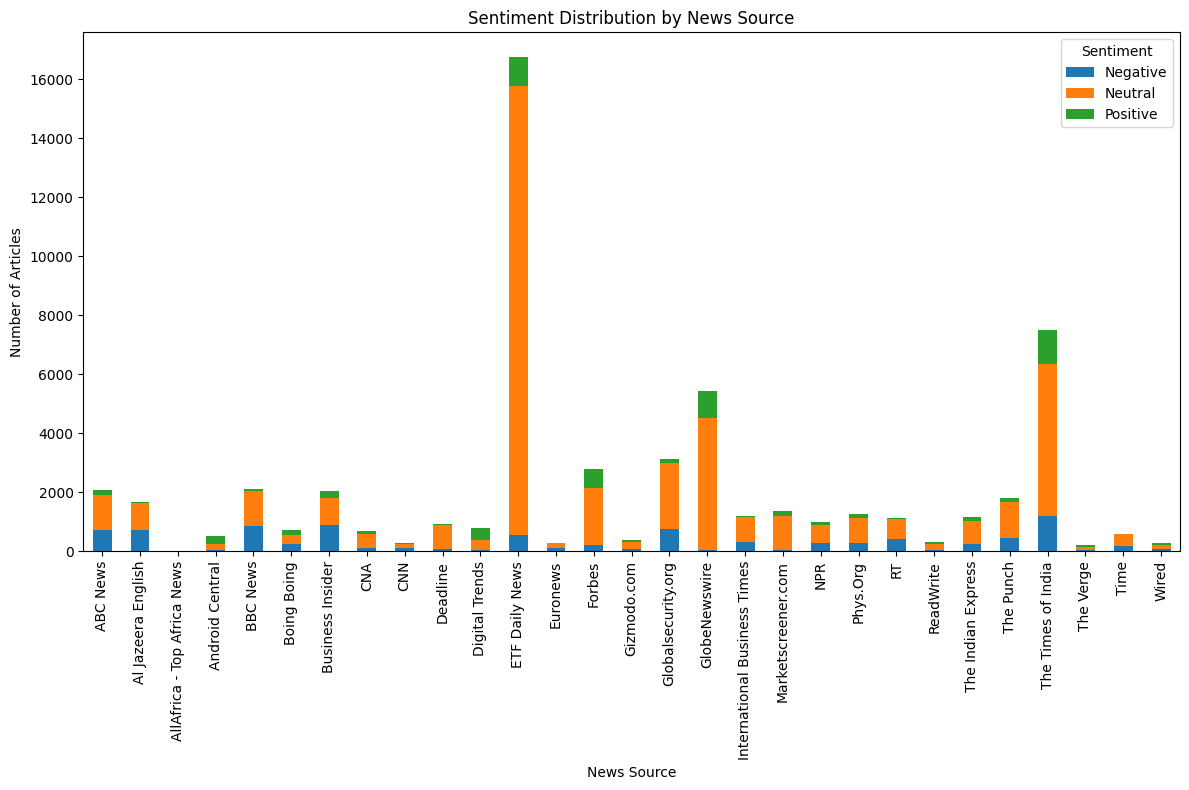

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and it contains columns 'source_name' and 'title_sentiment'

# Count the number of articles for each combination of source_name and title_sentiment
pivot_table = df.pivot_table(index='source_name', columns='title_sentiment', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by News Source')
plt.xlabel('News Source')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


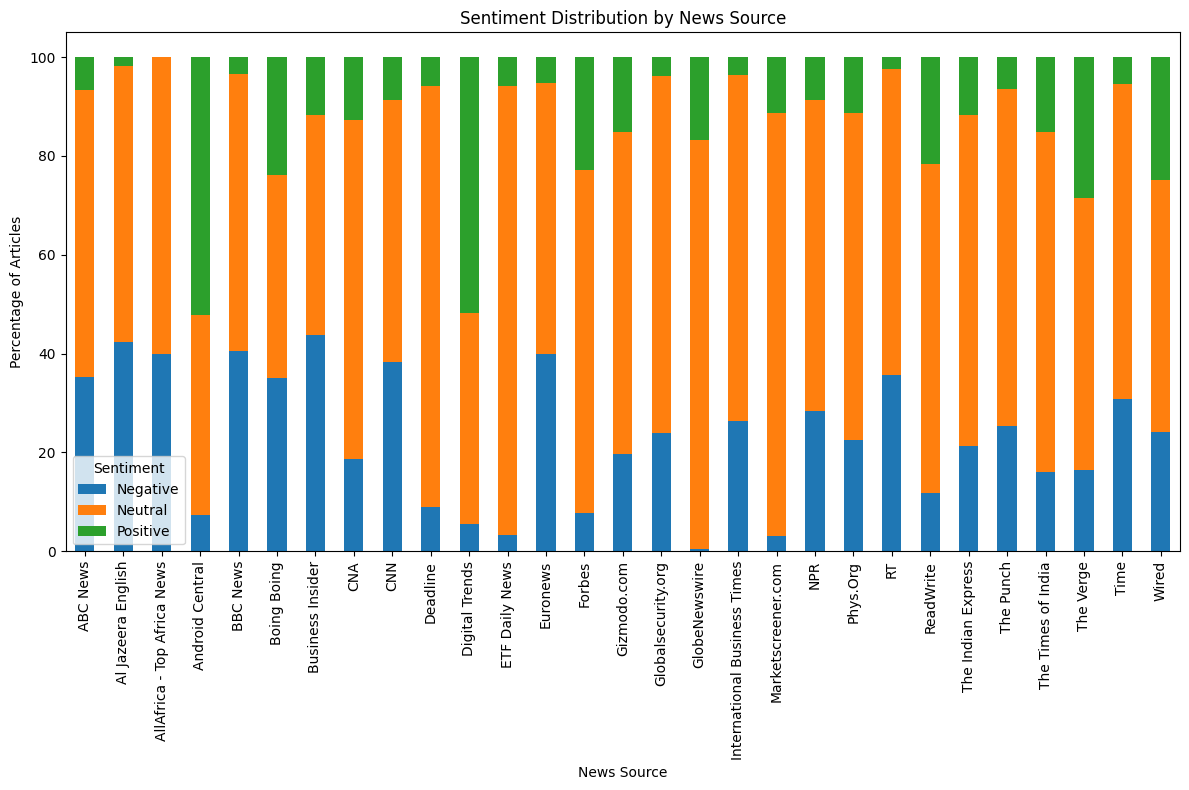

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and it contains columns 'source_name' and 'title_sentiment'

# Count the number of articles for each combination of source_name and title_sentiment
pivot_table = df.pivot_table(index='source_name', columns='title_sentiment', aggfunc='size', fill_value=0)

# Calculate percentages
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = pivot_table_percentage.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment Distribution by News Source')
plt.xlabel('News Source')
plt.ylabel('Percentage of Articles')


plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


In [12]:
import pickle

# Assuming svm_classifier is your trained SVM classifier
# Save the model to a file
with open('svm_classifier.pkl', 'wb') as f:
    pickle.dump(svm_classifier, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)  # Save TF-IDF vectorizer to file

In [11]:
# Example title to classify
input_title = "Ukraine has been bombed by Russia"

# Preprocess and vectorize the input title using the same vectorizer
preprocessed_input = vectorizer.transform([input_title])

# Use the trained SVM classifier to predict sentiment
sentiment_prediction = svm_classifier.predict(preprocessed_input)

# Print the sentiment prediction
print("Sentiment:", sentiment_prediction)


Sentiment: ['Negative']
